#Vowpal Wabbit parameter estimation    
##MNIST 784-pixel data

https://github.com/JohnLangford/vowpal_wabbit/wiki/Command-line-arguments
    


In [10]:
import re
import csv
import subprocess
from time import ctime

import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
#%qtconsole

In [12]:
!rm cv_train.vw.cache

In [13]:
vw_input_file = 'data/mnist_train.vw'

path_to_cache = 'cv_train.vw.cache'
output_file   = 'vw_cv_parms_tested.csv'
 
vw_params = '-d ' + vw_input_file + ' -b 19  --oaa 10  -f cv.model ' + \
            ' -q ii  --passes 10 -l 0.4 --power_t 0.6 ' + \
            ' --early_terminate 3 '

###

def get_loss( output ):
	pattern = r"average\s+loss\s+=\s+([0-9.e]+)+"
	m = re.search( pattern, output )
	loss = m.group( 1 )
	return loss

###

o_f = open( output_file, 'wb' )
writer = csv.writer( o_f )
writer.writerow( [ 'bits', 'loss' ] )

# =============================================
# ========= parameter ranges to test ==========

#param       = "--passes"
#param_name  = param + " over the data"
#param_range = range(5, 35+1, 1)

#param       = "-l"
#param_name  = param + " learning rate"
#param_range = np.arange(0.1, 1.1, .1)

param       = "--power_t"
param_name  = param
param_range = np.arange(0, 1.1, .1)

#param       = "-b"
#param_name  = param + " hash table entry bit size"
#param_range = range(12, 30+1, 1)

# ========= parameter ranges to test ==========
# =============================================

for b in param_range:
	
	cmd = 'vw {} --cache_file {} {} {} 2>&1'.format( vw_params, path_to_cache, param, b )	
	print cmd
	
	output = subprocess.check_output( '{} | tee /dev/stderr'.format( cmd ), shell = True )
	loss = get_loss( output )
	
	print "\n{} value: {}, loss: {}\n{}\n".format( param_name, b, loss, ctime() )
	
	writer.writerow( [ b, loss ] )
	o_f.flush()


vw -d data/mnist_train.vw -b 19  --oaa 10  -f cv.model  -q ii  --passes 10 -l 0.4  --early_terminate 3  --cache_file cv_train.vw.cache --power_t 0.0 2>&1

--power_t value: 0.0, loss: 0.012250
Wed Jul 22 22:47:54 2015

vw -d data/mnist_train.vw -b 19  --oaa 10  -f cv.model  -q ii  --passes 10 -l 0.4  --early_terminate 3  --cache_file cv_train.vw.cache --power_t 0.1 2>&1

--power_t value: 0.1, loss: 0.011917
Wed Jul 22 22:57:57 2015

vw -d data/mnist_train.vw -b 19  --oaa 10  -f cv.model  -q ii  --passes 10 -l 0.4  --early_terminate 3  --cache_file cv_train.vw.cache --power_t 0.2 2>&1

--power_t value: 0.2, loss: 0.011667
Wed Jul 22 23:07:57 2015

vw -d data/mnist_train.vw -b 19  --oaa 10  -f cv.model  -q ii  --passes 10 -l 0.4  --early_terminate 3  --cache_file cv_train.vw.cache --power_t 0.3 2>&1

--power_t value: 0.3, loss: 0.011417
Wed Jul 22 23:17:53 2015

vw -d data/mnist_train.vw -b 19  --oaa 10  -f cv.model  -q ii  --passes 10 -l 0.4  --early_terminate 3  --cache_file cv_train.vw

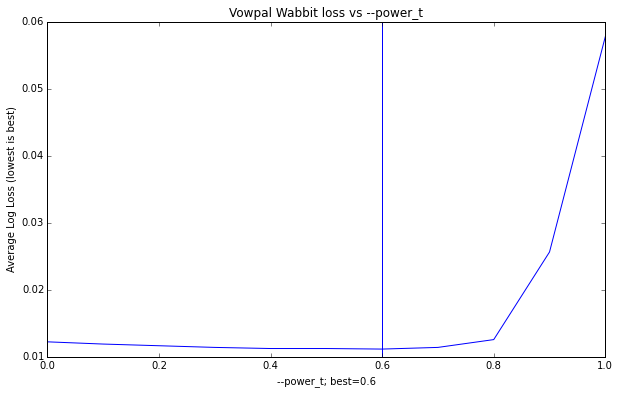

In [14]:
input_file = output_file

d = pd.read_csv( input_file )

plt.figure(figsize=(10,6))
plt.title("Vowpal Wabbit loss vs {0}".format(param_name) )
plt.xlabel("{0}; best={1}".format(param_name, d.bits[np.argmin(d.loss)]) )

plt.plot( d.bits, d.loss )
plt.ylabel("Average Log Loss (lowest is best)")
plt.axvline(x=d.bits[np.argmin(d.loss)])

plt.show()